# Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/thuyduc/Documents/GitHub/AIO2025/Module 4/Datasets/Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = data[['GRE Score', 'CGPA', 'Research']]
df = df.dropna()
df[['GRE Score', 'CGPA']] = scaler.fit_transform(df[['GRE Score', 'CGPA']])
df.head()


,GRE Score,CGPA,Research
0,1.762107,1.764818,1
1,0.627656,0.455151,1
2,-0.070467,-1.005631,1
3,0.453126,0.119339,1
4,-0.244998,-0.653029,0


# Logistic Regression

In [102]:
np.ones(5).shape

(5,)

In [103]:
X = df[['GRE Score', 'CGPA']].values
y = df[['Research']].values

X = np.c_[np.ones(X.shape[0]), X]
y = y.squeeze()
w = np.random.rand(3)
y.shape, X.shape, w.shape

((400,), (400, 3), (3,))

In [104]:
# X = df[['GRE Score', 'CGPA']]
# X = np.array([np.ones(len(X)), X.iloc[:, 0], X.iloc[:, 1]]).T
# y = df['Research'].to_numpy()
# w = np.random.rand(3)
# X

# Cross entropy loss

In [105]:
import numpy as np

def calculate_z(X, w):
    z = np.dot(X, w)
    return z

def calculate_sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))  # Removed +1e-2
    return sigmoid

def calculate_loss_binary_entropy(y_true, y_pred):
    epsilon = 1e-10  # Small value to avoid log(0)
    cost = - y_true * np.log(y_pred + epsilon) - (1 - y_true) * np.log(1 - y_pred + epsilon)
    loss = np.mean(cost)
    return loss

def calculate_GD_binary_entropy(y, y_hat, X):
    derivative = np.dot(X.T, (y_hat - y)) / y.size
    return derivative

z = calculate_z(X, w)
sigmoid = calculate_sigmoid(z)
loss = calculate_loss_binary_entropy(y, sigmoid)
sigmoid
loss
dldw = calculate_GD_binary_entropy(y, sigmoid, X)
dldw


array([-0.00369526, -0.0190007 ,  0.00235375])

## Train

In [106]:
X = df[['GRE Score', 'CGPA']].values
y = df[['Research']].values
X = np.c_[np.ones(X.shape[0]), X]
y = y.squeeze()

y.shape, X.shape

((400,), (400, 3))

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify= y_test)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((320, 3), (40, 3), (40, 3), (320,), (40,), (40,))

In [120]:
alpha = 0.003
epochs = 20
batch_size  = 10
w = np.random.rand(3)

Epoch 1/20, loss: 0.49489139292917644, f1: 0.782608695652174, accuracy: 0.75
Best f1: 0.782608695652174
Epoch 2/20, loss: 0.4923675870866601, f1: 0.782608695652174, accuracy: 0.75
Epoch 3/20, loss: 0.48993296727493146, f1: 0.782608695652174, accuracy: 0.75
Epoch 4/20, loss: 0.4875833600053266, f1: 0.782608695652174, accuracy: 0.75
Epoch 5/20, loss: 0.48531483675514175, f1: 0.782608695652174, accuracy: 0.75
Epoch 6/20, loss: 0.4831236969684613, f1: 0.782608695652174, accuracy: 0.75
Epoch 7/20, loss: 0.48100645238795775, f1: 0.782608695652174, accuracy: 0.75
Epoch 8/20, loss: 0.4789598126046234, f1: 0.782608695652174, accuracy: 0.75
Epoch 9/20, loss: 0.47698067172237674, f1: 0.782608695652174, accuracy: 0.75
Epoch 10/20, loss: 0.47506609604360894, f1: 0.782608695652174, accuracy: 0.75
Epoch 11/20, loss: 0.4732133126900627, f1: 0.782608695652174, accuracy: 0.75
Epoch 12/20, loss: 0.4714196990810263, f1: 0.782608695652174, accuracy: 0.75
Epoch 13/20, loss: 0.4696827731977269, f1: 0.7826086

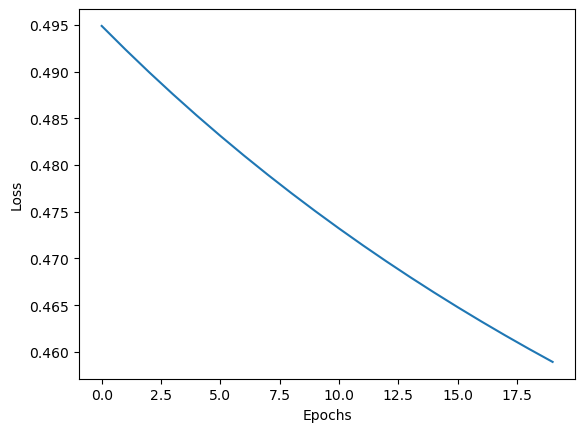

In [121]:
# Trainning (mini-batch)
from sklearn.metrics import f1_score, accuracy_score
def GD_mini_batch(X_train, y_train, X_val, y_val, w, alpha, epochs, batch_size):
    lossess = []
    best_w = w
    best_f1 = 0
    
    for epoch in range(epochs):
        # Training loop
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i : i + batch_size, :]
            y_batch = y_train[i : i + batch_size]

            #Calculate z
            z = calculate_z(X_batch, w)

            #Calculate y_hat
            y_prob_hat = calculate_sigmoid(z)

            #Calculate loss
            loss = calculate_loss_binary_entropy(y_batch, y_prob_hat)

            #Calculate gradient
            dldw = calculate_GD_binary_entropy(y_batch, y_prob_hat, X_batch)

            # Update w
            w = w - alpha * dldw
        
        lossess.append(loss)

        # Validation loop
        z_val = calculate_z(X_val, w)

        y_prob_val = calculate_sigmoid(z_val)

        y_label_predict = [1 if i > 0.5 else 0 for i in y_prob_val]

        f1 = f1_score(y_val, y_label_predict)
        accuracy = accuracy_score(y_val, y_label_predict)

        print(f'Epoch {epoch + 1}/{epochs}, loss: {loss}, f1: {f1}, accuracy: {accuracy}')
        
        if f1 > best_f1:
            best_f1 = f1
            best_w = w
            print(f"Best f1: {best_f1}")

    return best_w, lossess

best_w, lossess = GD_mini_batch(X_train, y_train, X_val, y_val, w, alpha, epochs, batch_size)

plt.plot(lossess)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


## Evaluate

In [122]:
z_test = calculate_z(X_test, best_w)
y_prob_test = calculate_sigmoid(z_test)
y_label_predict = [1 if i > 0.5 else 0 for i in y_prob_test]
f1 = f1_score(y_test, y_label_predict)
accuracy = accuracy_score(y_test, y_label_predict)
f1, accuracy

(0.7727272727272727, 0.75)

# MSE

In [124]:
X = df[['GRE Score', 'CGPA']].values
y = df[['Research']].values

X = np.c_[np.ones(X.shape[0]), X]
y = y.squeeze()
w = np.random.rand(3)
y.shape, X.shape, w.shape

((400,), (400, 3), (3,))

In [126]:
def calculate_z(X, w):
    z = np.dot(X, w)
    return z

def calculate_sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))  # Removed +1e-2
    return sigmoid

def calculate_loss_MSE(y_true, y_pred):
    cost = np.square(y_true - y_pred)
    loss = np.mean(cost)
    return loss

def calculate_GD_MSE(y, y_hat, X):
    derivative = (-2 * np.dot(X.T ,(y - y_hat) * y_hat * (1 - y_hat))) / y.size
    return derivative

z = calculate_z(X, w)
sigmoid = calculate_sigmoid(z)
loss = calculate_loss_MSE(y, sigmoid)
sigmoid
loss
dldw = calculate_GD_binary_entropy(y, sigmoid, X)
dldw

array([ 0.04058504, -0.01854036, -0.00975127])

## Train

In [127]:
X = df[['GRE Score', 'CGPA']].values
y = df[['Research']].values
X = np.c_[np.ones(X.shape[0]), X]
y = y.squeeze()

y.shape, X.shape

((400,), (400, 3))

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify= y_test)
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((320, 3), (40, 3), (40, 3), (320,), (40,), (40,))

In [131]:
alpha = 0.003
epochs = 20
batch_size  = 10
w = np.random.rand(3)

Epoch 1/20, loss: 0.22866045154169323, f1: 0.7719298245614035, accuracy: 0.675
Best f1: 0.7719298245614035
Epoch 2/20, loss: 0.2267214353370691, f1: 0.7719298245614035, accuracy: 0.675
Epoch 3/20, loss: 0.22482326178190531, f1: 0.7857142857142857, accuracy: 0.7
Best f1: 0.7857142857142857
Epoch 4/20, loss: 0.22296520469532374, f1: 0.7857142857142857, accuracy: 0.7
Epoch 5/20, loss: 0.22114652259577033, f1: 0.7636363636363637, accuracy: 0.675
Epoch 6/20, loss: 0.21936646223005202, f1: 0.7636363636363637, accuracy: 0.675
Epoch 7/20, loss: 0.21762426179015404, f1: 0.7636363636363637, accuracy: 0.675
Epoch 8/20, loss: 0.21591915383306692, f1: 0.7777777777777778, accuracy: 0.7
Epoch 9/20, loss: 0.21425036791972785, f1: 0.7777777777777778, accuracy: 0.7
Epoch 10/20, loss: 0.21261713298968585, f1: 0.7777777777777778, accuracy: 0.7
Epoch 11/20, loss: 0.2110186794882932, f1: 0.7777777777777778, accuracy: 0.7
Epoch 12/20, loss: 0.2094542412631632, f1: 0.7777777777777778, accuracy: 0.7
Epoch 13/2

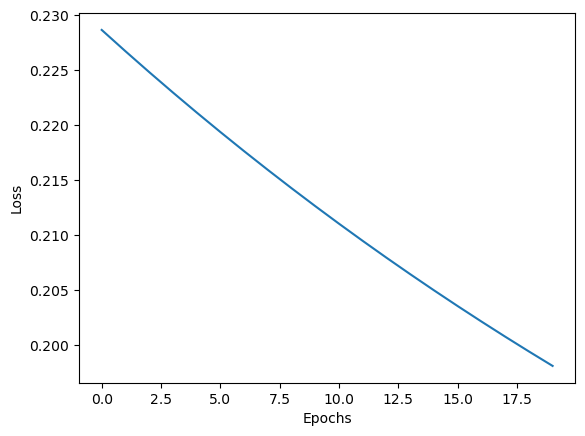

In [132]:
# Trainning (mini-batch)
from sklearn.metrics import f1_score, accuracy_score
def GD_mini_batch(X_train, y_train, X_val, y_val, w, alpha, epochs, batch_size):
    lossess = []
    best_w = w
    best_f1 = 0
    
    for epoch in range(epochs):
        # Training loop
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i : i + batch_size, :]
            y_batch = y_train[i : i + batch_size]

            #Calculate z
            z = calculate_z(X_batch, w)

            #Calculate y_hat
            y_prob_hat = calculate_sigmoid(z)

            #Calculate loss
            loss = calculate_loss_MSE(y_batch, y_prob_hat)

            #Calculate gradient
            dldw = calculate_GD_MSE(y_batch, y_prob_hat, X_batch)

            # Update w
            w = w - alpha * dldw
        
        lossess.append(loss)

        # Validation loop
        z_val = calculate_z(X_val, w)

        y_prob_val = calculate_sigmoid(z_val)

        y_label_predict = [1 if i > 0.5 else 0 for i in y_prob_val]

        f1 = f1_score(y_val, y_label_predict)
        accuracy = accuracy_score(y_val, y_label_predict)

        print(f'Epoch {epoch + 1}/{epochs}, loss: {loss}, f1: {f1}, accuracy: {accuracy}')
        
        if f1 > best_f1:
            best_f1 = f1
            best_w = w
            print(f"Best f1: {best_f1}")

    return best_w, lossess

best_w, lossess = GD_mini_batch(X_train, y_train, X_val, y_val, w, alpha, epochs, batch_size)

plt.plot(lossess)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
